## Notebook Page

In [47]:
import mechwolf as mw
import graphviz
import math
from datetime import timedelta
from astropy.table import QTable, Table, Column
from sigfig import round

### Reagents

In [61]:
# TODO - Print out limiting reagent
# TODO - read in output from json file
mw_limiting = 214.22
mass_scale = input("Enter mass of limiting reagent in grams: ")

try:
    mass_scale = float(mass_scale)
except:
    print('Invalid input: numerical values only')

moles = mass_scale / mw_limiting

print(f'\nMoles: {moles}')

Enter mass of limiting reagent in grams: 1

Moles: 0.004668098216786481


In [62]:
concentration = input("What concentration of starting material (M): ")

try:
    concentration = float(concentration)
except:
    print('Invalid input: numerical values only')
    
volume = (moles * 1000) / concentration

print(f'\nVolume: {volume} mL')

What concentration of starting material (M): 0.6

Volume: 7.780163694644135 mL


In [48]:
# TODO - get rid of formula

class Reagent:
    
    def __init__(self, name, formula, inChi, mol_weight, eq):
        self.name = name
        self.formula = formula
        self.inChi = inChi
        self.mol_weight = mol_weight
        self.eq = eq
        self.moles = round(moles * self.eq, decimals = 4)
        self.mass = round(self.moles * self.mol_weight, decimals = 4)
        
    def __str__(self):
        return f"{self.name} - {self.formula}"
    
class Solids(Reagent):
    
    def __init__(self, name, formula, inChi, mol_weight, eq, solv_volume):
        super().__init__(name, formula, inChi, mol_weight, eq)
        self.solv_volume = solv_volume
        self.molarity = round(self.moles / self.solv_volume, decimals = 4)

Diacetyl_Rhamnal = Solids("Diacetyl Rhamnal", "C10H14O5", "NDEGMKQAZZBNBB-OUBRSPPYSA-N", 214.22, 1.0, 1.56)
NaOMe = Solids("NaOMe", "NaCH3O", "WQDUMFSSJAZKTM-UHFFFAOYSA-N", 54.05, 5.0, 1.56)
TBSCl = Solids("TBSCl", "C6H15ClSi", "BCNZYOJHNLTNEZ-UHFFFAOYSA-N", 150.72, 3.4, 1.56)
DMAP = Solids("DMAP", "C7H10N2", "PSHKMPUSSFXUIA-UHFFFAOYSA-N", 122.17, 0.4, 1.56)

class Liquids(Reagent):
    
    def __init__(self, name, formula, inChi, mol_weight, density, eq):
        super().__init__(name, formula, inChi, mol_weight, eq)
        self.density = density
        self.volume = round(self.eq * moles * (self.mol_weight / self.density), decimals = 4)
        
MeOH = Liquids("MeOH", "CH4O", "OKKJLVBELUTLKV-UHFFFAOYSA-N", 32.04, 0.791, 2.0)
Et3N = Liquids("Et3N", "C6H15N", "ZMANZCXQSJIPKH-UHFFFAOYSA-N", 101.19, 0.726, 3.4)
NaHMDS = Liquids("NaHMDS", "C6H18NNaSi2", "WRIKHQLVHPKCJU-UHFFFAOYSA-N", 183.37, 0.183, 2.0)
BnBr = Liquids("BnBr", "C7H7Br", "AGEZXYOZHKGVCM-UHFFFAOYSA-N", 171.04, 1.44, 5.0)

reagent_list = [Diacetyl_Rhamnal, NaOMe, MeOH, TBSCl, DMAP, Et3N, NaHMDS, BnBr]

for reagent in reagent_list:
    print(reagent)

Diacetyl Rhamnal - C10H14O5
NaOMe - NaCH3O
MeOH - CH4O
TBSCl - C6H15ClSi
DMAP - C7H10N2
Et3N - C6H15N
NaHMDS - C6H18NNaSi2
BnBr - C7H7Br


### Stoichiometry Table

In [49]:
#solvent
solvent = "DMF"
formula_solvent = "solvent formula"
density_solvent_g_mL = 0.948
mw_solvent = 73.10

print("***** REAGENT TABLE *****")
reagent_table = QTable()
reagent_table['Reagent'] = [reagent.name for reagent in reagent_list]
reagent_table['Formula'] = [reagent.formula for reagent in reagent_list]
reagent_table['Molecular Weight (g/mol)'] = [reagent.mol_weight for reagent in reagent_list]

if moles < 0.0005:
    reagent_table['mmol'] = [reagent.moles * 1000 for reagent in reagent_list]
    reagent_table['Mass (mg)'] = [round(reagent.mass * 1000, decimals = 4) for reagent in reagent_list]
else:
    reagent_table['mol'] = [reagent.moles for reagent in reagent_list]
    reagent_table['Mass (g)'] = [round(reagent.mass, decimals = 4) for reagent in reagent_list]

reagent_table['Volume (mL)'] = [reagent.volume if hasattr(reagent, 'volume') else "N/A" for reagent in reagent_list]
reagent_table['Density (g/mL)'] = [reagent.density if hasattr(reagent, 'density') else "N/A" for reagent in reagent_list]
reagent_table['eq'] = [reagent.eq for reagent in reagent_list]

reagent_table.pprint(max_lines=-1, max_width=-1)

print("\n")

print("***** SOLVENT TABLE *****")
solvent_table = QTable()
solvent_table['Solvent'] = ["DMF"]
solvent_table['Formula'] = ["C3H7NO"]
solvent_table['Molecular Weight (g/mol)'] = ['73.09']

solvent_table.pprint(max_lines=-1, max_width=-1)

***** REAGENT TABLE *****
    Reagent        Formula   Molecular Weight (g/mol) mmol Mass (mg) Volume (mL) Density (g/mL)  eq
---------------- ----------- ------------------------ ---- --------- ----------- -------------- ---
Diacetyl Rhamnal    C10H14O5                   214.22  0.5     107.1         N/A            N/A 1.0
           NaOMe      NaCH3O                    54.05  2.3     124.3         N/A            N/A 5.0
            MeOH        CH4O                    32.04  0.9      28.8      0.0378          0.791 2.0
           TBSCl   C6H15ClSi                   150.72  1.6     241.2         N/A            N/A 3.4
            DMAP     C7H10N2                   122.17  0.2      24.4         N/A            N/A 0.4
            Et3N      C6H15N                   101.19  1.6     161.9      0.2212          0.726 3.4
          NaHMDS C6H18NNaSi2                   183.37  0.9     165.0      0.9355          0.183 2.0
            BnBr      C7H7Br                   171.04  2.3     393.4      

### Pumps

In [50]:
# Harvard pump code
import time
import asyncio
from loguru import logger
from mechwolf import _ureg, Pump

class HarvardSyringePump(Pump):
    def __init__(self, syringe_volume, syringe_diameter, serial_port, name=None):
        super().__init__(name = name)
        self.serial_port = serial_port
        self.syringe_volume = _ureg.parse_expression(syringe_volume)
        self.syringe_diameter = _ureg.parse_expression(syringe_diameter)
        
    def __enter__(self):
        import aioserial

        self._ser = aioserial.AioSerial(
            self.serial_port,
            115200,
            parity = aioserial.PARITY_NONE,
            stopbits = 1,
            timeout = 1,
            write_timeout = 1,)
        syringe_volume_ml = self.syringe_volume.to(_ureg.ml).magnitude 
        syringe_diameter_mm = self.syringe_diameter.to(_ureg.mm).magnitude
        self._ser.write(f'svolume {syringe_volume_ml} ml\r'.encode())
        self._ser.write(f'diameter {syringe_diameter_mm}\r'.encode())

        return self
    
    def __exit__(self, exc_type, exc_value, traceback):
        self.rate = _ureg.parse_expression("0 mL/min")
        self._ser.write(b'stop\r') 
        
        del self._ser

    async def _update(self):
        rate_mlmin = self.rate.to(_ureg.ml / _ureg.min).magnitude
        if rate_mlmin == 0:
            self._ser.write(b'stop\r') 
        else:
            self._ser.write(f'irate {rate_mlmin} m/m\r'.encode())
            self._ser.write(b'irun\r')

In [51]:
pump_1 = HarvardSyringePump("24mL", "20.05mm", serial_port = '/dev/tty.usbmodemD4038611', name = "Pump 1")
pump_2 = HarvardSyringePump("24mL", "20.05mm", serial_port = '/dev/tty.usbmodemD4038591', name = "Pump 2")
pump_3 = HarvardSyringePump("24mL", "20.05mm", serial_port = '/dev/tty.usbmodemD4038601', name = "Pump 3")

### Syringe, Tubing, and Mixer Information

In [63]:
# TODO - put in a utilies file (ok but call tube length calculator)
import math

mL_to_inches = 16.3871

def tube_length():
    global mL_to_inches
    
    inner_diameter = float(input("Enter the inner diameter in inches: "))
    flow_rate = float(input("Enter the flow rate in mL/min: "))
    residence_time = float(input("Enter the residence time in seconds: "))

    area = math.pi * (inner_diameter / 2) ** 2
    rt_in_minutes = residence_time / 60
    answer = round((rt_in_minutes * flow_rate) / (area * mL_to_inches * 12), 2)
    print(f'The length of the reaction tube in feet should be: {answer}ft')
    
tube_length()

Enter the inner diameter in inches: 1
Enter the flow rate in mL/min: 1
Enter the residence time in seconds: 1
The length of the reaction tube in feet should be: 0.00011ft


In [53]:
# TODO - add in specifications for the thingies

#reagent vessels
reagent_vessel_1 = mw.Vessel("Diacetyl Rhamnal", name = "Starting Material")
reagent_vessel_2 = mw.Vessel("NaOMe", name = "NaOMe + MeOH in DMF")
reagent_vessel_3 = mw.Vessel("TBSCl", name = "TBSCl + DMAP")
reagent_vessel_4 = mw.Vessel("KHMDS", name = "KHMDS in DMF")
reagent_vessel_5 = mw.Vessel("BnBr", name = "BnBr in DMF")
product_vessel = mw.Vessel("C3 benzylated rhamnal", name = "product")

#tubing
def big_tube(length):
    return mw.Tube(length = length, ID = "0.062 in", OD = "1/8 in", material = "PFA")

sugar = big_tube(length = "1 foot")
NaOMe = big_tube(length = "1 foot")
deacetylation = big_tube(length = "16 foot")
TBSCl = big_tube(length = "1 foot")
protection = big_tube(length = "32 foot")
NaHMDS = big_tube(length = "17 foot")
deprotonation = big_tube(length = "18 foot")
BnBr = big_tube(length = "1 foot")
benzylation = big_tube(length = "64 foot")

#mixers
def Tmixer(name):
    return mw.TMixer(name = name)

T_1 = Tmixer(deacetylation)
T_2 = Tmixer(protection)
T_3 = Tmixer(deprotonation)
T_4 = Tmixer(benzylation) 

### Apparatus 

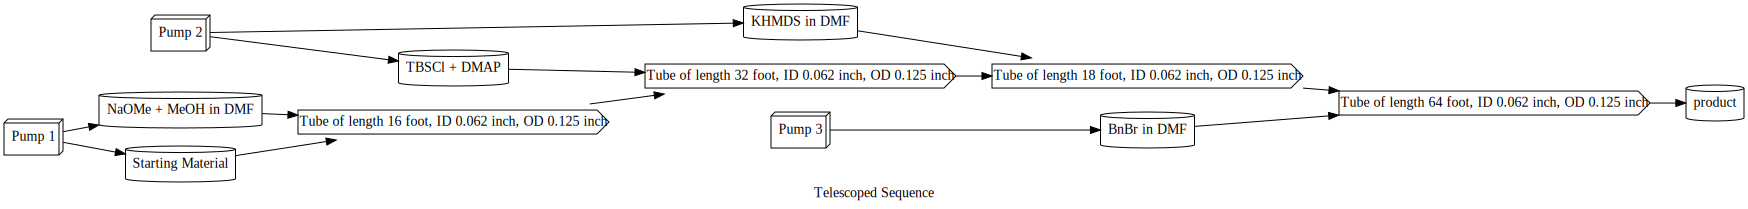

In [55]:
A = mw.Apparatus("Telescoped Sequence")

A.add(pump_1, reagent_vessel_1, sugar)
A.add(pump_1, reagent_vessel_2, NaOMe)
A.add(reagent_vessel_1, T_1, sugar)
A.add(reagent_vessel_2, T_1, NaOMe)
A.add(T_1, T_2, deacetylation)


A.add(pump_2, reagent_vessel_3, TBSCl)
A.add(pump_2, reagent_vessel_4, NaHMDS)
A.add(reagent_vessel_3, T_2, TBSCl)
A.add(reagent_vessel_4, T_3, NaHMDS)
A.add(T_2, T_3, protection)
A.add(T_3, T_4, deprotonation)


A.add(pump_3, reagent_vessel_5, BnBr)
A.add(reagent_vessel_5, T_4, BnBr)
A.add(T_4, product_vessel, benzylation)

A.describe()
A.visualize()

### Protocol

In [ ]:
P = mw.Protocol(A)

switch = timedelta(minutes = 1)

current = timedelta(seconds = 0)

pump_1_initial = timedelta(minutes = 3.8)
P.add(pump_1, start = current,
              duration = pump_1_initial, rate = "0.5mL/min")

current += pump_1_initial + switch

deacetylation = timedelta(minutes = 7.7) 
P.add(pump_1, start = current, 
              duration = deacetylation + NaHMDS_1, rate = "0.5mL/min")

current += deacetylation

NaHMDS_1 = timedelta(minutes = 4)
P.add(pump_2, start = current,
              duration = NaHMDS_1, rate = "1mL/min")

current += NaHMDS_1 + switch

NaHMDS_2 = timedelta(minutes = 4) 
P.add(pump_1, start = current, 
              duration = NaHMDS_2, rate = "0.5mL/min")
P.add(pump_2, start = current, 
              duration = NaHMDS_2, rate = "1mL/min")
      
current += NaHMDS_2 + switch 

protection_deprotonation = timedelta(minutes = 6.4)    
P.add(pump_1, start = current, 
              duration = protection_deprotonation + BnBr_1, rate = "0.5mL/min")
P.add(pump_2, start = current, 
              duration = protection_deprotonation + BnBr_1, rate = "1mL/min")

current += protection_deprotonation

BnBr_1 = timedelta(minutes = 5.67) 
P.add(pump_3, start = current + protection_deprotonation, 
              duration = BnBr_1, rate = "3mL/min")

current += BnBr_1 + switch

benzylation = timedelta(minutes = 6.7)
P.add(pump_1, start = current, 
              duration = benzylation, rate = "0.5mL/min")
P.add(pump_2, start = current, 
              duration = benzylation, rate = "1mL/min")
P.add(pump_3, start = current, 
              duration = benzylation, rate = "3mL/min")

current += benzylation

print(f'TOTAL TIME: {current}')
P.execute(confirm = True)

### Product and Yield Information

In [17]:
product = "Benzylated rhamnal"
product_molecular_weight = 334.53

theoretical_yield = round(moles * product_molecular_weight, decimals = 4)

if molesscale < 0.0005:
    theoretical_yield *= 1000
    units = 'mg'
else:
    units = 'g'

print(product + "; molecular weight: ", product_molecular_weight)

print("Theoretical Yield:", theoretical_yield, units)

actual_yield = float(input(f"Enter mass of product in {units}: "))
print("Actual Yield:", actual_yield, units)

percent_yield = round((actual_yield / theoretical_yield) * 100, decimals = 1)
print("Percent Yield:", percent_yield, "%")

Benzylated rhamnal; molecular weight:  334.53
Theoretical Yield: 1.5616 g
Enter mass of product in g: 1.2
Actual Yield: 1.2 g
Percent Yield: 76.8 %
